In [16]:
include("util.jl")

In [17]:
cond, ref, x = read_data("dataSum/data00030.dat");
cond, ref

(3.61e8, 0.7925604332764857)

# Number of exact digits

The number of exact digits of a quantity $x$ is defined as:

\begin{align}
s_x = -log_{10}\left\vert\frac{x_{float}-x_{exact}}{x_{exact}}\right\vert
\end{align}

In [18]:
# ref: exact result
# inp: input data
# fun: computation
# T:   number type
function reliable_digits(ref, inp, fun, ::Val{T}) where {T}
    res = fun(T.(inp))
    err = abs((ref-res)/ref)
    max(-log10(err), 0)
end

reliable_digits (generic function with 2 methods)

For an ill-conditioned sum (condition number $\simeq10^8$), we expect to lose approximately 8 significant decimal digits. Starting from a maximum of 16 decimal digits for 64-bit floating-point numbers, 8 digits should remain reliable.

In [19]:
reliable_digits(ref, x, sum, Val(Float64))

8.491629048682006

Starting from a maximum of 7 decimal digits for 32-bit FP numbers, no digit should remain reliable.

In [38]:
reliable_digits(ref, x, sum, Val(Float32))

0.0

Let's try this on a large amount of data, with ever more ill-conditioned summations. All vectors have length 100.

In [35]:
plot()
title!("Sum of 100 numbers");
xaxis!("Condition Number", :log10);
yaxis!("Reliable digits");

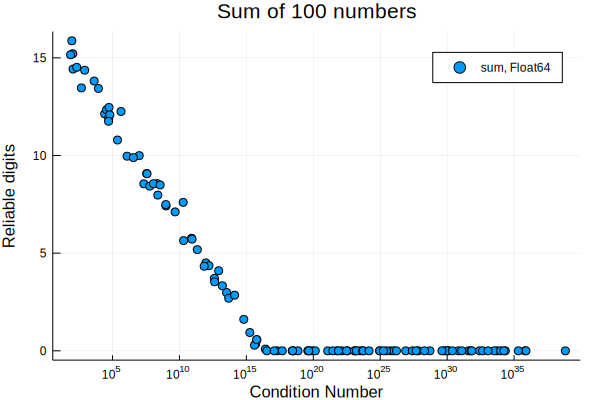

In [36]:
test(sum, Float64)

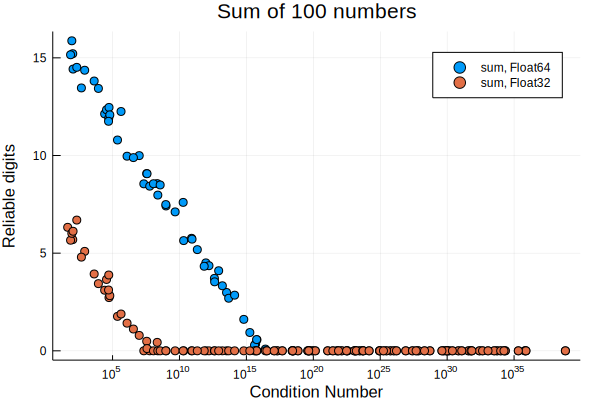

In [37]:
test(sum, Float32)

# Rational Numbers

Of course, in this case (where all calculations involve only elementary operations), it is possible to increase the accuracy using rational numbers. (This is how reference results were obtained, by the way.)

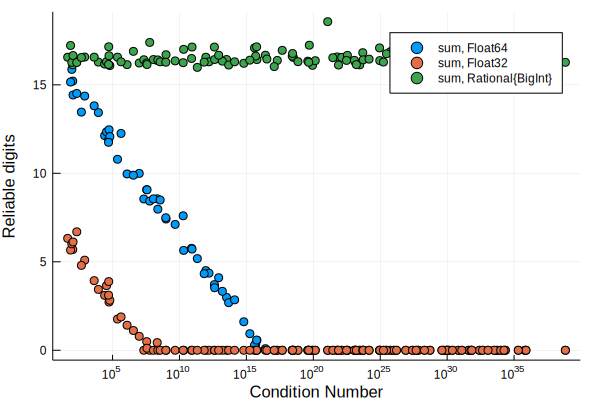

In [34]:
test(sum, Rational{BigInt})

# Stochastic Arithmetic

What if we had more complex operations?
- square root
- trigonometric functions

In this case we lose everything:

- can't compute accurate results
- can't assess floating-point quality

Various techniques can help with this last point; Stochastic Arithmetic is one of them:

In [24]:
using StochasticArithmetic

for _ in 1:10
    sum(SFloat64.(x)) |> println
end

SFloat{Float64}(0.7925603375061151)
SFloat{Float64}(0.792560352756508)
SFloat{Float64}(0.7925603375079201)
SFloat{Float64}(0.7925603971089409)
SFloat{Float64}(0.7925604121265317)
SFloat{Float64}(0.7925603078220271)
SFloat{Float64}(0.7925602931573205)
SFloat{Float64}(0.7925603228341326)
SFloat{Float64}(0.7925603526455782)
SFloat{Float64}(0.792560367546711)


In [25]:
@reliable_digits sum(SFloat64.(x))

(0.7925603659023646, 7.376231442303605)

In [26]:
using StochasticArithmetic: SFloat

# inp: input data
# fun: computation
# T:   number type (stochastic)
function reliable_digits(_, inp, fun, ::Val{T}) where {T<:SFloat}
    _, s = @reliable_digits fun(T.(inp))
    max(s, 0)
end

reliable_digits (generic function with 2 methods)

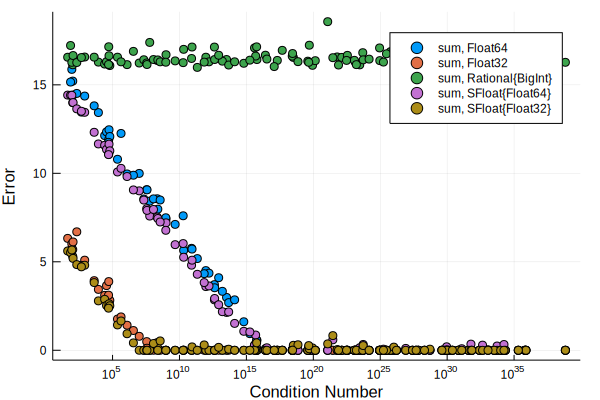

In [27]:
test(sum, SFloat64)
test(sum, SFloat32)